## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline

train, test = keras.datasets.cifar10.load_data()

## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

Using TensorFlow backend.


In [2]:
from keras.layers import Input, Dense, BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):    
    """
    Build your own model
    """
    input_layer = Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [3]:
## 超參數設定
"""
Set your hyper-parameters
"""
epochs = 50
batch_size = 256
monitor = ['val_loss', 'val_acc']
patience = [5, 10, 25]

In [5]:
results = {}
# 載入 Callbacks
"""
Earlystop setting
"""
from keras.callbacks import EarlyStopping

for moni in monitor:
    for pati in patience:
        earlystop = EarlyStopping(monitor=moni, patience=pati, verbose=1)
        """
        Your Training loop and Plot the results
        """
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(f'monitor = {moni}, patience = {pati}')
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=0.01, nesterov=True, momentum=0.95)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True, 
                  callbacks=[earlystop])

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        
        name_tag = f'monitor = {moni}, patience = {pati}'
        results[name_tag] = {'train-loss': train_loss, 'valid-loss': valid_loss, 
                             'train-acc': train_acc, 'valid-acc': valid_acc}

monitor = val_loss, patience = 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)   

50000/50000 [==============================] - 7s 136us/step - loss: 1.3536 - acc: 0.5176 - val_loss: 1.6603 - val_acc: 0.4212
Epoch 4/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.2794 - acc: 0.5467 - val_loss: 1.6797 - val_acc: 0.4331
Epoch 5/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.2230 - acc: 0.5664 - val_loss: 1.6105 - val_acc: 0.4386
Epoch 6/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.1733 - acc: 0.5820 - val_loss: 1.5627 - val_acc: 0.4539
Epoch 7/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.1371 - acc: 0.5971 - val_loss: 1.7234 - val_acc: 0.4244
Epoch 8/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.0977 - acc: 0.6117 - val_loss: 1.6102 - val_acc: 0.4530
Epoch 9/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.0611 - acc: 0.6245 - val_loss: 1.5576 - val_acc: 0.4576
Epoch 10/50
50000/50000 [====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.6871 - acc: 0.4084 - val_loss: 1.6123 - val_acc: 0.4243
Epoch 2/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.4484 - acc: 0.4859 - val_loss: 1.6638 - val_acc: 0.4126
Epoch 3/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.3507 - acc: 0.5192 - val_loss: 1.7411 - val_acc: 0.3913
Epoch 4/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.2833 - acc: 0.5441 - val_loss: 1.7306 - val_acc: 0.4136
Epoch 5/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.2311 - acc: 0.5650 - val_loss: 1.6595 - val_acc: 0.4390
Epoch 6/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.1777 - acc: 0.5829 - val_loss: 1.6576 - val_acc: 0.4315
Epoch 7/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.1289 - acc: 0.5990 - val_loss: 1.5296 - 

50000/50000 [==============================] - 7s 130us/step - loss: 0.8577 - acc: 0.6954 - val_loss: 1.6411 - val_acc: 0.4790
Epoch 16/50
50000/50000 [==============================] - 7s 130us/step - loss: 0.8224 - acc: 0.7065 - val_loss: 1.8531 - val_acc: 0.4412
Epoch 17/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.8023 - acc: 0.7135 - val_loss: 1.8815 - val_acc: 0.4387
Epoch 18/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.7679 - acc: 0.7253 - val_loss: 2.0371 - val_acc: 0.4239
Epoch 19/50
50000/50000 [==============================] - 6s 128us/step - loss: 0.7478 - acc: 0.7313 - val_loss: 1.9345 - val_acc: 0.4384
Epoch 20/50
50000/50000 [==============================] - 6s 129us/step - loss: 0.7182 - acc: 0.7440 - val_loss: 2.0020 - val_acc: 0.4366
Epoch 21/50
50000/50000 [==============================] - 6s 127us/step - loss: 0.6899 - acc: 0.7545 - val_loss: 2.1838 - val_acc: 0.4348
Epoch 22/50
50000/50000 [==============

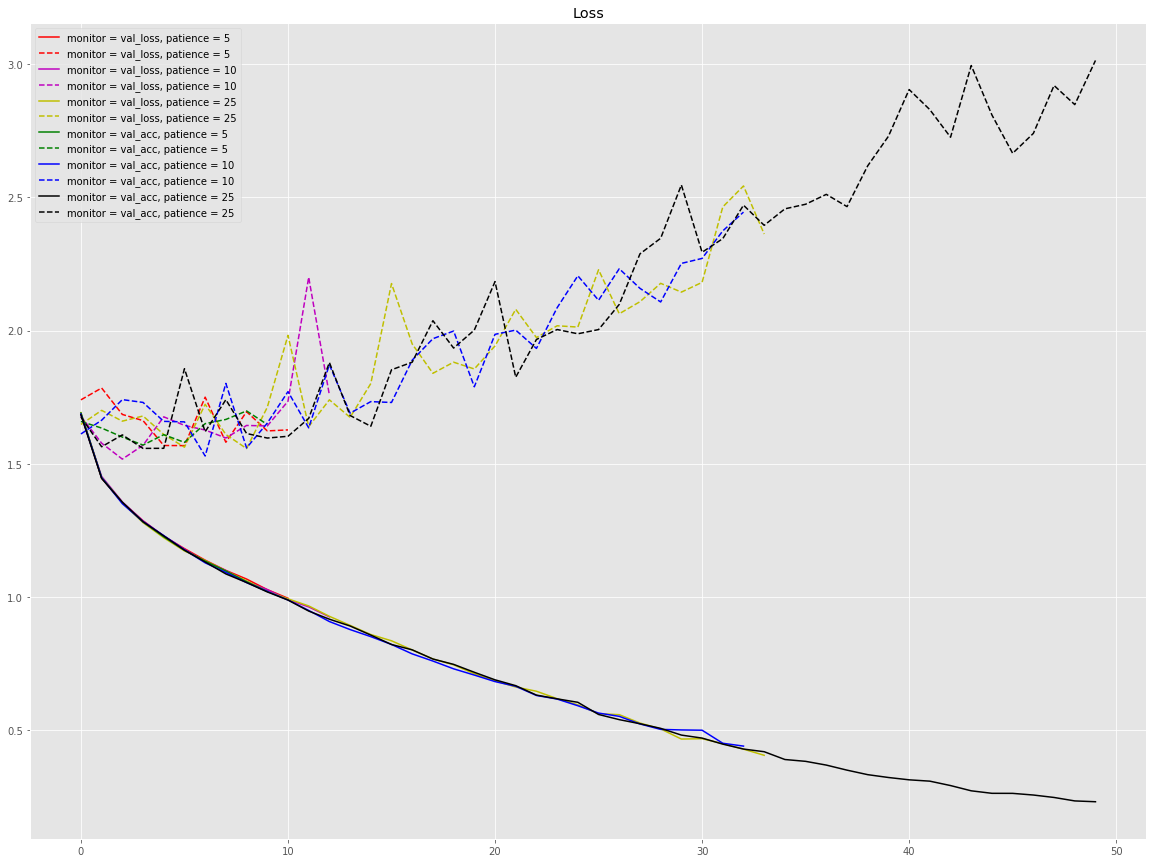

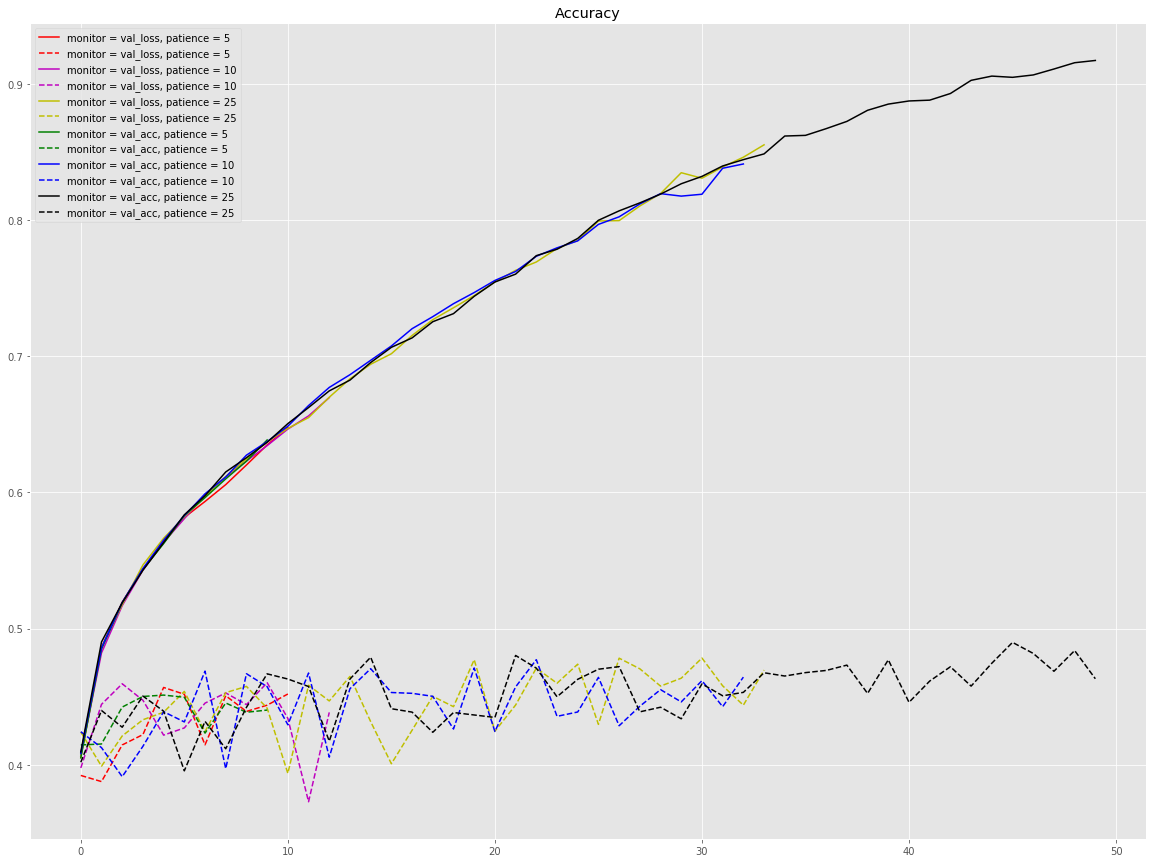

In [6]:
plt.style.use('ggplot')
color_bar = ['r', 'm', 'y', 'g', 'b', 'k']

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()